# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [661]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, RobustScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import joblib
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import math
from google.colab import files

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [662]:
# Load data
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [663]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [664]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [665]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe(include='object')

,TransactionID,AccountID,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerOccupation,PreviousTransactionDate
count,2508,2516,2509,2507,2507,2507,2517,2514,2510,2514,2513
unique,2484,495,2485,2,43,681,591,100,3,4,360
top,TX001748,AC00362,2023-10-20 17:53:13,Debit,Fort Worth,D000573,200.136.146.93,M026,Branch,Student,2024-11-04 08:09:17
freq,2,12,2,1942,71,9,12,46,868,657,18


In [666]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

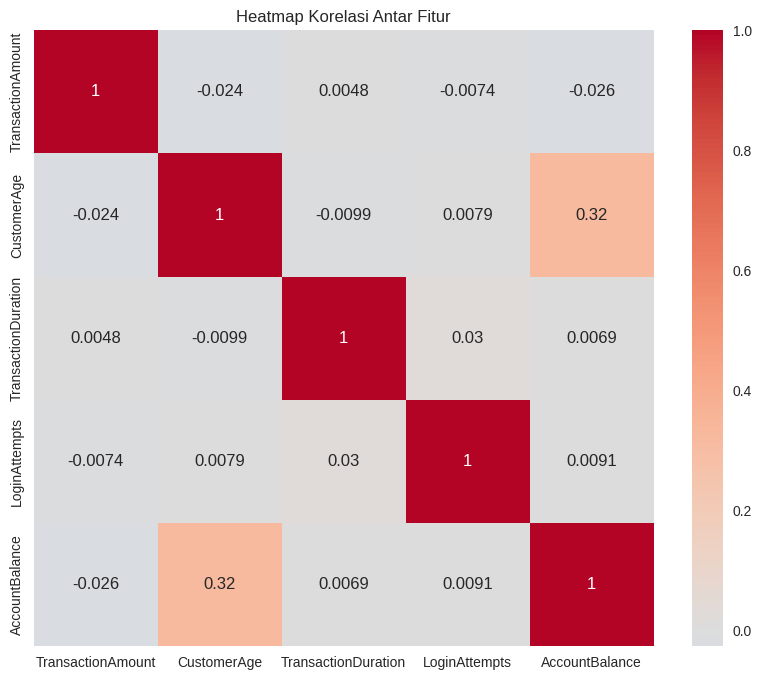

In [667]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0)
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

In [668]:
df.corr(numeric_only=True)

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
TransactionAmount,1.000000,-0.024428,0.004782,-0.007397,-0.026310
CustomerAge,-0.024428,1.000000,-0.009852,0.007876,0.321161
TransactionDuration,0.004782,-0.009852,1.000000,0.030076,0.006859
LoginAttempts,-0.007397,0.007876,0.030076,1.000000,0.009088
AccountBalance,-0.026310,0.321161,0.006859,0.009088,1.000000


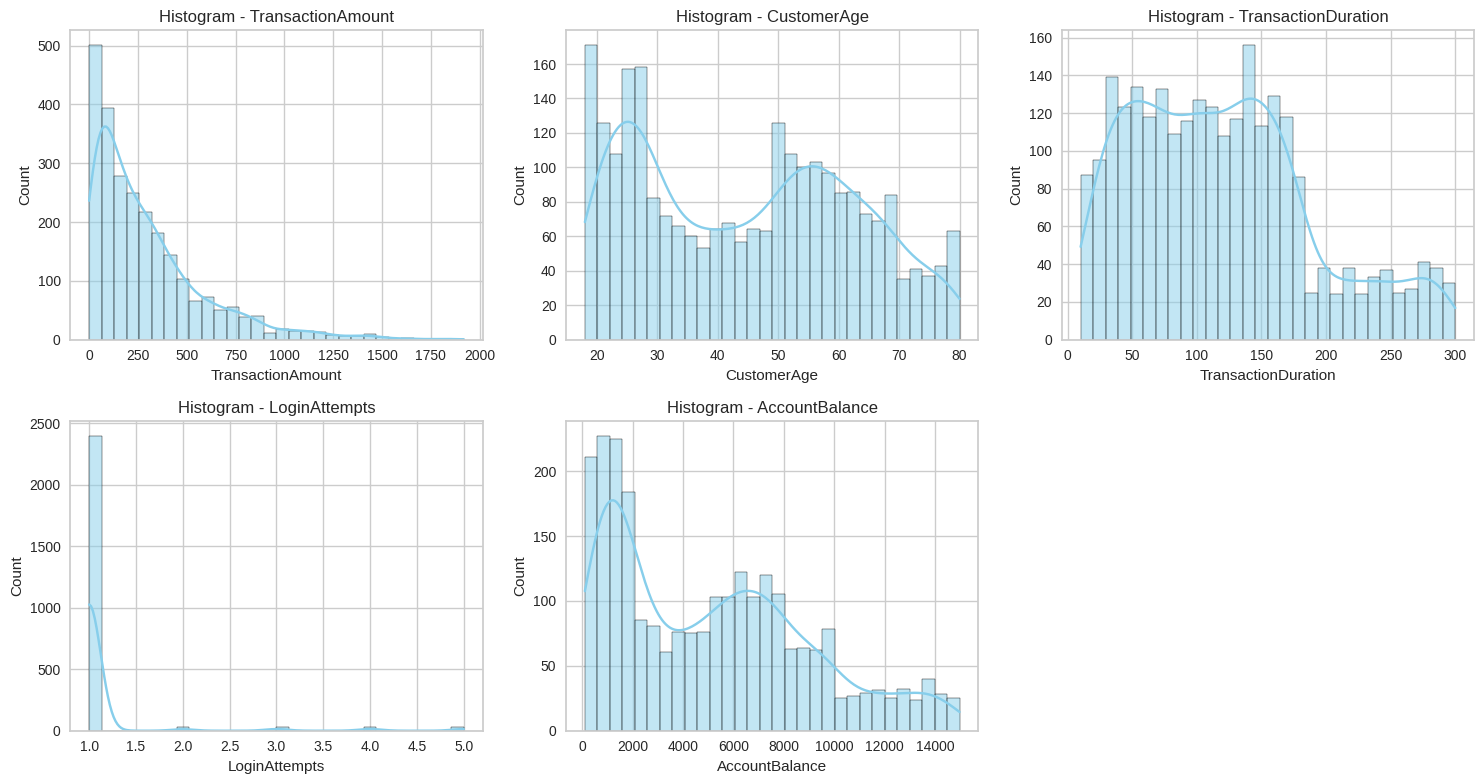

In [669]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
# Ambil hanya kolom numerik
numerik = df.select_dtypes(include=['number']).columns

n_cols = 3  # jumlah grafik per baris
n_rows = math.ceil(len(numerik) / n_cols)

plt.figure(figsize=(n_cols*5, n_rows*4))

for i, col in enumerate(numerik, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], bins=30, kde=True, color="skyblue")
    plt.title(f"Histogram - {col}")

plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

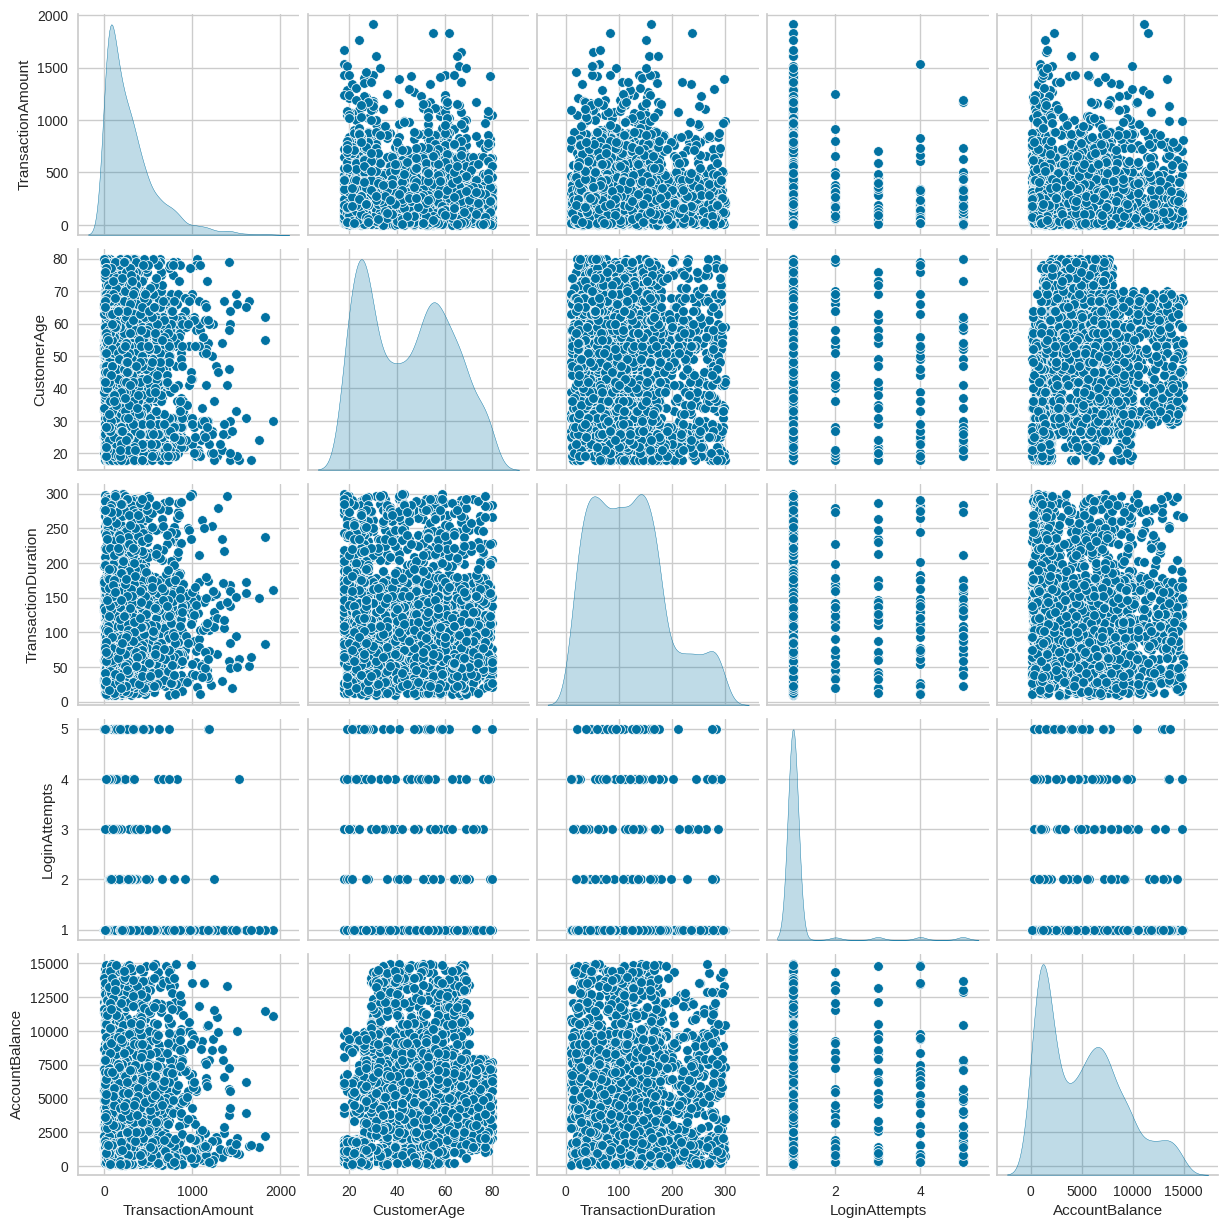

In [670]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
# Pairplot untuk fitur numerik
sns.pairplot(df.select_dtypes(include=['number']), diag_kind='kde')
plt.show()

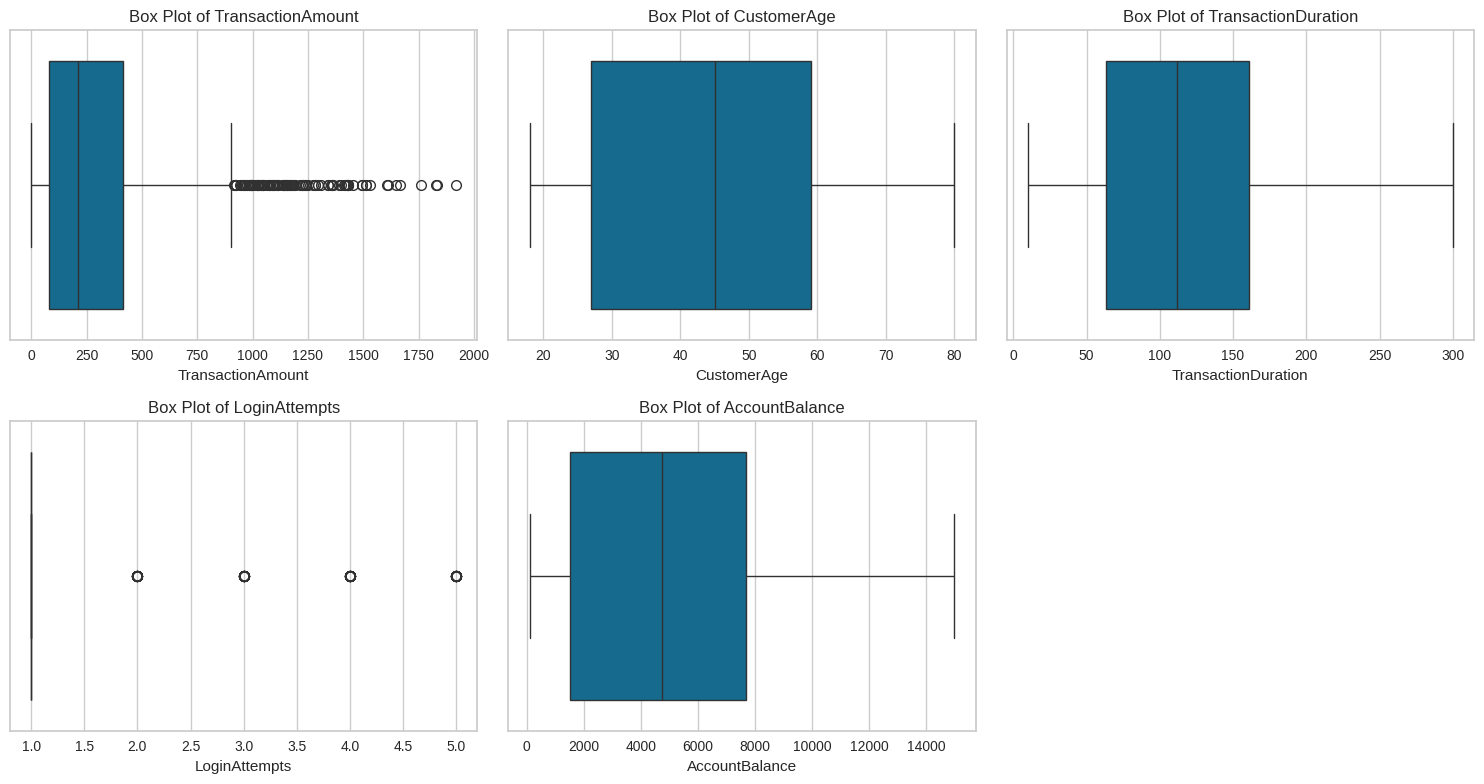

In [671]:
# Ambil hanya kolom numerik
numerik = df.select_dtypes(include=['number']).columns

n_cols = 3  # jumlah grafik per baris
n_rows = math.ceil(len(numerik) / n_cols)

plt.figure(figsize=(n_cols*5, n_rows*4))

for i, col in enumerate(numerik, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df[col])
    plt.title(f"Box Plot of {col}")

plt.tight_layout()
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [672]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
TransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [673]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(21)

In [674]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.

"""
saya menggunakan feature extraction supaya "TransctionDate" dan "PreviousTransactionDate" lebih interpretable,
karena datetime mentah tidak punya arti langsung dalam clustering.
Yang dipakai adalah hasil ekstraksi yang bisa dipahami sebagai perilaku nasabah.
"""

# Konversi ke datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])

# Ekstraksi fitur waktu
df['DaysSinceFirst'] = (df['TransactionDate'] - df['TransactionDate'].min()).dt.days
df['DaysSincePrev'] = (df['TransactionDate'] - df['PreviousTransactionDate']).dt.days.abs()
df['TransactionHour'] = df['TransactionDate'].dt.hour
df['TransactionDayOfWeek'] = df['TransactionDate'].dt.dayofweek
df['TransactionMonth'] = df['TransactionDate'].dt.month

# Drop fitur datetime asli (karena sudah diekstraksi)
df = df.drop(columns=['TransactionDate', 'PreviousTransactionDate'])

# Scaling dengan MinMax
scaler =  MinMaxScaler()
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols]) # scalling untuk kolom numerik

# Tampilkan Output
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,DaysSinceFirst,DaysSincePrev,TransactionHour,TransactionDayOfWeek,TransactionMonth
0,TX000001,AC00128,0.007207,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.838710,Doctor,0.244828,0.0,0.336832,0.271978,0.728022,0.0,0.25,0.272727
1,TX000002,AC00455,0.195940,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.806452,Doctor,0.451724,0.0,0.918055,0.483516,0.516484,0.0,0.25,0.454545
2,TX000003,AC00019,0.065680,Debit,Mesa,D000235,215.97.143.157,M009,Online,0.016129,Student,0.158621,0.0,0.068637,0.519231,0.480769,1.0,0.00,0.545455
3,TX000004,AC00070,0.096016,Debit,Raleigh,D000187,200.13.225.150,M002,Online,0.129032,Student,0.051724,0.0,0.569198,0.337912,0.662088,0.0,1.00,0.363636
4,TX000005,AC00411,0.006874,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,0.648276,0.0,0.492591,0.788462,0.211538,0.5,0.00,0.818182


In [675]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
cols_to_drop = df.columns[df.columns.str.contains('id|ip', case=False, regex=True)]
df = df.drop(columns=cols_to_drop)

print("Kolom yang dihapus:", list(cols_to_drop))
df.head()

Kolom yang dihapus: ['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID']


,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,DaysSinceFirst,DaysSincePrev,TransactionHour,TransactionDayOfWeek,TransactionMonth
0,0.007207,Debit,San Diego,ATM,0.838710,Doctor,0.244828,0.0,0.336832,0.271978,0.728022,0.0,0.25,0.272727
1,0.195940,Debit,Houston,ATM,0.806452,Doctor,0.451724,0.0,0.918055,0.483516,0.516484,0.0,0.25,0.454545
2,0.065680,Debit,Mesa,Online,0.016129,Student,0.158621,0.0,0.068637,0.519231,0.480769,1.0,0.00,0.545455
3,0.096016,Debit,Raleigh,Online,0.129032,Student,0.051724,0.0,0.569198,0.337912,0.662088,0.0,1.00,0.363636
4,0.006874,Credit,Atlanta,Online,NaN,Student,0.648276,0.0,0.492591,0.788462,0.211538,0.5,0.00,0.818182


In [676]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.

# Dictionary untuk simpan encoder tiap kolom
encoders = {}

# Ambil semua kolom kategorikal
categorical_columns = df.select_dtypes(include='object').columns

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # paksa ke string biar aman kalau ada NaN
    encoders[col] = le

# Cek hasilnya
print("Kolom yang diencode:", list(categorical_columns))
df.head()

Kolom yang diencode: ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']


,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,DaysSinceFirst,DaysSincePrev,TransactionHour,TransactionDayOfWeek,TransactionMonth
0,0.007207,1,36,0,0.838710,0,0.244828,0.0,0.336832,0.271978,0.728022,0.0,0.25,0.272727
1,0.195940,1,15,0,0.806452,0,0.451724,0.0,0.918055,0.483516,0.516484,0.0,0.25,0.454545
2,0.065680,1,23,2,0.016129,3,0.158621,0.0,0.068637,0.519231,0.480769,1.0,0.00,0.545455
3,0.096016,1,33,2,0.129032,3,0.051724,0.0,0.569198,0.337912,0.662088,0.0,1.00,0.363636
4,0.006874,0,1,2,NaN,3,0.648276,0.0,0.492591,0.788462,0.211538,0.5,0.00,0.818182


In [677]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
df.columns.tolist()

['TransactionAmount',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'DaysSinceFirst',
 'DaysSincePrev',
 'TransactionHour',
 'TransactionDayOfWeek',
 'TransactionMonth']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [678]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).

# Simpan jumlah missing sebelum imputasi
missing_before = df.isnull().sum()

# Imputasi
df['TransactionAmount'] = df['TransactionAmount'].fillna(df['TransactionAmount'].median())
df['CustomerAge'] = df['CustomerAge'].fillna(df['CustomerAge'].median())
df['TransactionDuration'] = df['TransactionDuration'].fillna(df['TransactionDuration'].median())
df['LoginAttempts'] = df['LoginAttempts'].fillna(df['LoginAttempts'].mode()[0])
df['AccountBalance'] = df['AccountBalance'].fillna(df['AccountBalance'].median())
df['DaysSinceFirst'] = df['DaysSinceFirst'].fillna(df['DaysSinceFirst'].median())
df['DaysSincePrev'] = df['DaysSincePrev'].fillna(df['DaysSincePrev'].median())
df['TransactionHour'] = df['TransactionHour'].fillna(df['TransactionHour'].mode()[0])
df['TransactionDayOfWeek'] = df['TransactionDayOfWeek'].fillna(df['TransactionDayOfWeek'].mode()[0])
df['TransactionMonth'] = df['TransactionMonth'].fillna(df['TransactionMonth'].mode()[0])

# Simpan jumlah missing setelah imputasi
missing_after = df.isnull().sum()

# Gabungkan jadi satu DataFrame
missing_summary = pd.DataFrame({
    'Sebelum': missing_before,
    'Sesudah': missing_after
})

missing_summary

,Sebelum,Sesudah
TransactionAmount,26,0
TransactionType,0,0
Location,0,0
Channel,0,0
CustomerAge,18,0
CustomerOccupation,0,0
TransactionDuration,26,0
LoginAttempts,21,0
AccountBalance,27,0
DaysSinceFirst,28,0


In [679]:
# Menghapus data duplikat menggunakan drop_duplicates().
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [680]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.

# --- Hitung jumlah outlier sebelum capping ---
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (df < lower_bound) | (df > upper_bound)
outlier_counts_before = outliers.sum()

# --- Lakukan capping ---
for col in ['TransactionAmount', 'LoginAttempts']:  # hanya numerik yg relevan
    lower_cap = df[col].quantile(0.05)
    upper_cap = df[col].quantile(0.95)
    df[col] = np.where(df[col] < lower_cap, lower_cap, df[col])
    df[col] = np.where(df[col] > upper_cap, upper_cap, df[col])

# --- Hitung jumlah outlier setelah capping ---
outliers_after = (df < lower_bound) | (df > upper_bound)
outlier_counts_after = outliers_after.sum()

# --- Gabung hasil ke dalam DataFrame untuk rapi ---
outlier_report = pd.DataFrame({
    "Outlier Before": outlier_counts_before,
    "Outlier After": outlier_counts_after
})

print("\n Jumlah Outlier Sebelum & Sesudah Capping:")
outlier_report


 Jumlah Outlier Sebelum & Sesudah Capping:


,Outlier Before,Outlier After
TransactionAmount,113,0
TransactionType,593,593
Location,0,0
Channel,0,0
CustomerAge,0,0
CustomerOccupation,0,0
TransactionDuration,0,0
LoginAttempts,120,0
AccountBalance,0,0
DaysSinceFirst,0,0


In [681]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.

# Binning & encoding
bins_age = [0, 0.25, 0.45, 1.0]
labels_age = ['Young', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['CustomerAge'], bins=bins_age, labels=labels_age,
                        include_lowest=True, right=True)

df['BalanceGroup'] = pd.qcut(df['AccountBalance'], q=3, labels=['Low','Medium','High'])

le_age = LabelEncoder()
df['AgeGroup_enc'] = le_age.fit_transform(df['AgeGroup'].astype(str))

le_bal = LabelEncoder()
df['BalanceGroup_enc'] = le_bal.fit_transform(df['BalanceGroup'].astype(str))

# 🔹 Hanya ambil hasil binning encoded
df = df.drop(['AgeGroup','BalanceGroup'], axis=1)
df_model = df.drop(['CustomerAge','AccountBalance'], axis=1)

# Cek hasil
df.head(10)

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,DaysSinceFirst,DaysSincePrev,TransactionHour,TransactionDayOfWeek,TransactionMonth,AgeGroup_enc,BalanceGroup_enc
0,0.008428,1,36,0,0.838710,0,0.244828,0.0,0.336832,0.271978,0.728022,0.0,0.25,0.272727,1,2
1,0.195940,1,15,0,0.806452,0,0.451724,0.0,0.918055,0.483516,0.516484,0.0,0.25,0.454545,1,0
2,0.065680,1,23,2,0.016129,3,0.158621,0.0,0.068637,0.519231,0.480769,1.0,0.00,0.545455,2,1
3,0.096016,1,33,2,0.129032,3,0.051724,0.0,0.569198,0.337912,0.662088,0.0,1.00,0.363636,2,0
4,0.008428,0,1,2,0.435484,3,0.648276,0.0,0.492591,0.788462,0.211538,0.5,0.00,0.818182,0,0
5,0.047888,1,28,0,0.000000,3,0.558621,0.0,0.045738,0.250000,0.750000,0.5,0.00,0.272727,2,1
6,0.008428,0,39,0,0.306452,0,0.444828,0.0,0.888330,0.120879,0.879121,0.0,0.50,0.090909,0,0
7,0.089199,0,16,1,0.790323,2,0.968966,0.0,0.181155,0.346154,0.653846,0.5,0.00,0.363636,1,2
8,0.055226,0,11,1,0.532258,1,0.262069,0.0,0.604561,0.214286,0.785714,0.0,0.25,0.181818,1,0
9,0.425098,1,26,0,0.596774,0,0.379310,0.0,0.061884,0.241758,0.758242,0.0,1.00,0.181818,1,1


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [682]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
df.describe()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,DaysSinceFirst,DaysSincePrev,TransactionHour,TransactionDayOfWeek,TransactionMonth,AgeGroup_enc,BalanceGroup_enc
count,2514.000000,2514.000000,2514.000000,2514.00000,2514.000000,2514.000000,2514.000000,2514.0,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000
mean,0.147319,0.787987,21.284010,1.01074,0.429415,1.530231,0.377490,0.0,0.336864,0.505817,0.494848,0.310064,0.358990,0.507015,1.206046,1.000000
std,0.128526,0.437042,12.397534,0.83084,0.286157,1.150477,0.240156,0.0,0.260683,0.290982,0.289775,0.365415,0.377905,0.314853,0.682703,0.816659
min,0.008428,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.043213,1.000000,11.000000,0.00000,0.145161,0.250000,0.182759,0.0,0.095324,0.250000,0.244505,0.000000,0.000000,0.181818,1.000000,0.000000
50%,0.110014,1.000000,21.000000,1.00000,0.435484,2.000000,0.351724,0.0,0.311416,0.510989,0.489011,0.000000,0.250000,0.545455,1.000000,1.000000
75%,0.213328,1.000000,32.000000,2.00000,0.661290,3.000000,0.520690,0.0,0.506870,0.758242,0.750000,0.500000,0.750000,0.818182,2.000000,2.000000
max,0.456911,2.000000,43.000000,3.00000,1.000000,4.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000


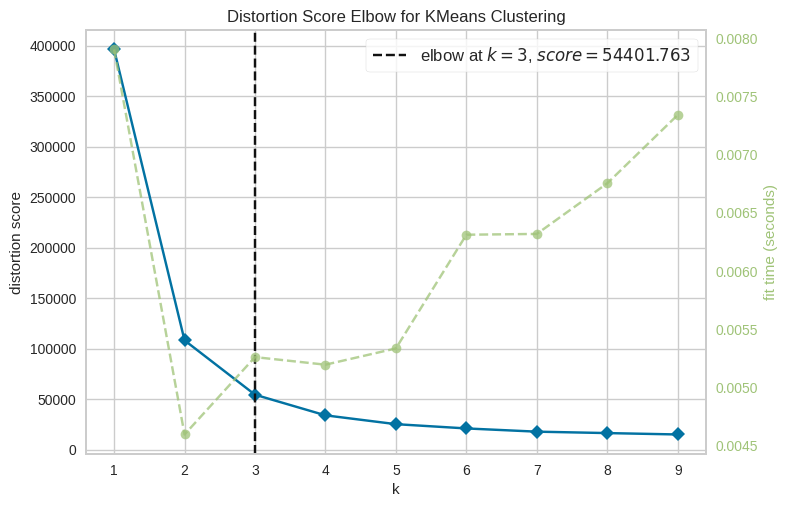

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [683]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(df_model)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [684]:
# Menggunakan algoritma K-Means Clustering
# Inisialisasi dan melatih model KMeans dengan jumlah cluster = 4
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df_model)

# Mendapatkan label cluster
labels = kmeans.labels_

df['Cluster'] = labels
df_model['Cluster'] = df['Cluster']
df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,DaysSinceFirst,DaysSincePrev,TransactionHour,TransactionDayOfWeek,TransactionMonth,AgeGroup_enc,BalanceGroup_enc,Cluster
0,0.008428,1,36,0,0.838710,0,0.244828,0.0,0.336832,0.271978,0.728022,0.0,0.25,0.272727,1,2,1
1,0.195940,1,15,0,0.806452,0,0.451724,0.0,0.918055,0.483516,0.516484,0.0,0.25,0.454545,1,0,0
2,0.065680,1,23,2,0.016129,3,0.158621,0.0,0.068637,0.519231,0.480769,1.0,0.00,0.545455,2,1,0
3,0.096016,1,33,2,0.129032,3,0.051724,0.0,0.569198,0.337912,0.662088,0.0,1.00,0.363636,2,0,1
4,0.008428,0,1,2,0.435484,3,0.648276,0.0,0.492591,0.788462,0.211538,0.5,0.00,0.818182,0,0,2


Jalankan cell code ini untuk menyimpan model kamu.

In [685]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [686]:
# Menghitung dan menampilkan nilai Silhouette Score.
# Hitung Silhouette Score
score = silhouette_score(df_model, labels)
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.5259


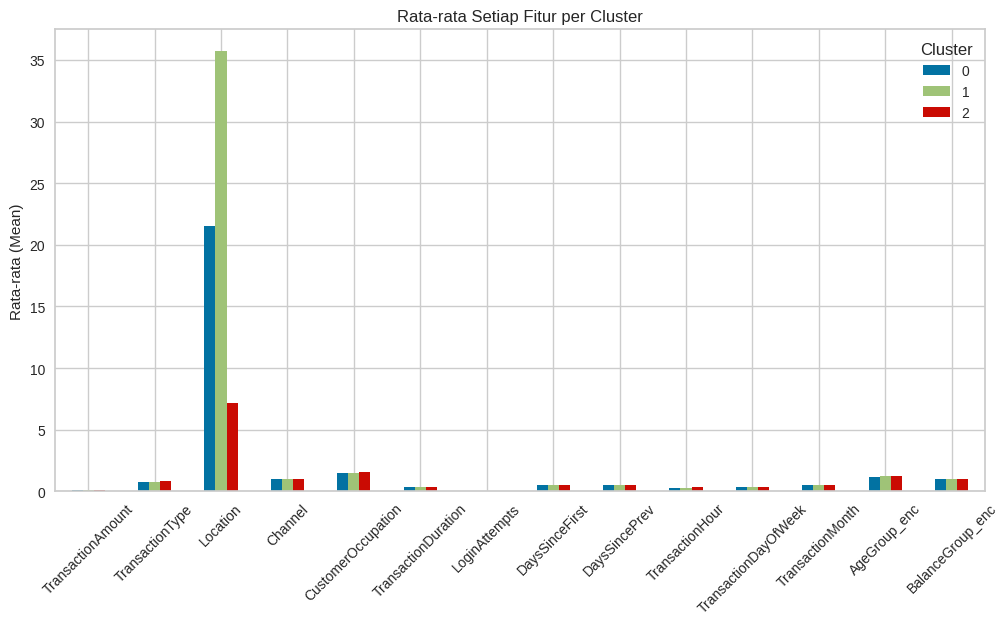

In [687]:
# Membuat visualisasi hasil clustering

# Hitung rata-rata per cluster
cluster_means = df_model.groupby('Cluster').mean()

# Plot bar chart untuk setiap fitur
cluster_means.T.plot(kind='bar', figsize=(12,6))
plt.title("Rata-rata Setiap Fitur per Cluster")
plt.ylabel("Rata-rata (Mean)")
plt.xticks(rotation=45)
plt.legend(title="Cluster")
plt.show()

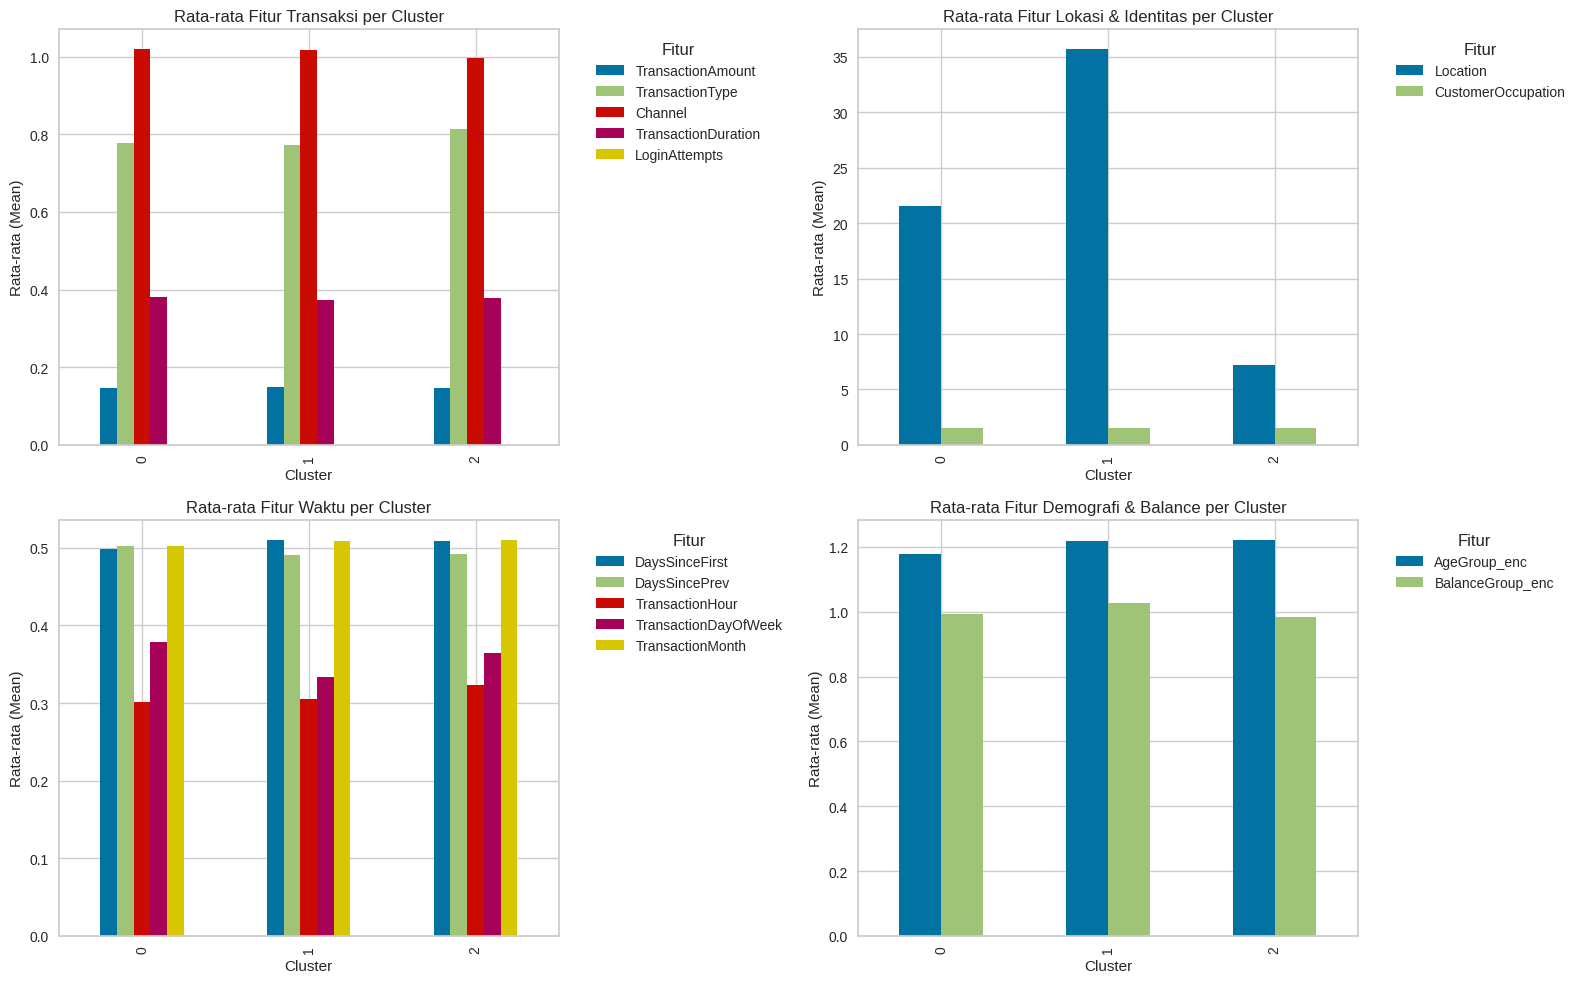

In [688]:
# Definisi grup fitur
feature_groups = {
    "Transaksi": ["TransactionAmount", "TransactionType", "Channel", "TransactionDuration", "LoginAttempts"],
    "Lokasi & Identitas": ["Location", "CustomerOccupation"],
    "Waktu": ["DaysSinceFirst", "DaysSincePrev", "TransactionHour", "TransactionDayOfWeek", "TransactionMonth"],
    "Demografi & Balance": ["AgeGroup_enc", "BalanceGroup_enc"]
}

# Hitung rata-rata per cluster
cluster_means = df_model.groupby("Cluster").mean()

# Buat grid 2x2
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for i, (group_name, features) in enumerate(feature_groups.items()):
    cluster_means[features].plot(kind="bar", ax=axes[i])
    axes[i].set_title(f"Rata-rata Fitur {group_name} per Cluster")
    axes[i].set_ylabel("Rata-rata (Mean)")
    axes[i].set_xlabel("Cluster")
    axes[i].legend(title="Fitur", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

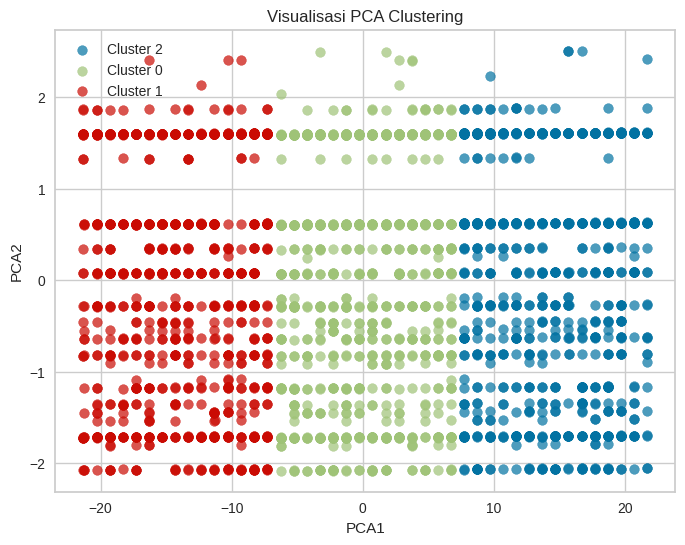

In [689]:
# Membangun model menggunakan PCA.

pca = PCA(n_components=2)   # misalnya kita ambil 2 komponen utama
df_pca = pca.fit_transform(df_model)

# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
# <data_final> = pd.DataFrame(___, columns=['PCA1', 'PCA2', <sesuaikan dengan jumlah n>])
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])

# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca.fit(df_pca)

# Tambahkan label cluster ke dataframe PCA
df_pca['Cluster'] = kmeans_pca.labels_

# Visualisasi Hasil PCA
plt.figure(figsize=(8,6))

# Scatter plot dengan warna berdasarkan cluster
for cluster in df_pca['Cluster'].unique():
    subset = df_pca[df_pca['Cluster'] == cluster]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=f'Cluster {cluster}', alpha=0.7)

plt.title("Visualisasi PCA Clustering")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()
plt.show()


In [690]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
joblib.dump(pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [691]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.
# Menampilkan analisis deskriptif minimal mean, min, dan max untuk fitur numerik
fitur_transaksi = ["TransactionAmount","TransactionType","Channel","TransactionDuration"]
fitur_waktu = ["TransactionMonth","TransactionDayOfWeek"]
fitur_demografi = ["Location","CustomerOccupation","AgeGroup_enc","BalanceGroup_enc"]

print("=== Fitur Transaksi ===")
df.groupby("Cluster")[fitur_transaksi].agg(["mean","min","max"])

=== Fitur Transaksi ===


TransactionAmount                     TransactionType          \
                     mean       min       max            mean min max   
Cluster                                                                 
0                0.147321  0.008428  0.456911        0.777911   0   2   
1                0.149385  0.008428  0.456911        0.772121   0   2   
2                0.145325  0.008428  0.456911        0.813084   0   2   

          Channel         TransactionDuration                 
             mean min max                mean  min       max  
Cluster                                                       
0        1.019208   0   3            0.380747  0.0  1.000000  
1        1.016970   0   3            0.372945  0.0  0.986207  
2        0.996495   0   3            0.378702  0.0  1.000000

In [692]:
print("=== Fitur Waktu ===")
df.groupby("Cluster")[fitur_waktu].agg(["mean","min","max"])

=== Fitur Waktu ===


TransactionMonth           TransactionDayOfWeek          
                    mean  min  max                 mean  min  max
Cluster                                                          
0               0.502237  0.0  1.0             0.378752  0.0  1.0
1               0.508871  0.0  1.0             0.333939  0.0  1.0
2               0.509877  0.0  1.0             0.363902  0.0  1.0

In [693]:
print("=== Fitur Demografi ===")
df.groupby("Cluster")[fitur_demografi].agg(["mean","min","max"])

=== Fitur Demografi ===


Location         CustomerOccupation         AgeGroup_enc          \
              mean min max               mean min max         mean min max   
Cluster                                                                      
0        21.513806  15  28           1.528211   0   4     1.177671   0   2   
1        35.703030  29  43           1.518788   0   4     1.219394   0   2   
2         7.163551   0  14           1.543224   0   4     1.220794   0   2   

        BalanceGroup_enc          
                    mean min max  
Cluster                           
0               0.991597   0   2  
1               1.026667   0   2  
2               0.982477   0   2

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya (Sebelum Inverse)

1. **Cluster 0: (Nasabah dengan transaksi stabil dan rata-rata)**

   * **TransactionAmount (mean):** 0.147 (rentang: 0.008 – 0.457)
   * **TransactionType (mean):** 0.778 (rentang: 0 – 2)
   * **Channel (mean):** 1.019 (rentang: 0 – 3)
   * **TransactionDuration (mean):** 0.381 (rentang: 0.0 – 1.0)
   * **TransactionMonth (mean):** 0.502 (rentang: 0.0 – 1.0)
   * **TransactionDayOfWeek (mean):** 0.379 (rentang: 0.0 – 1.0)
   * **Location (mean):** 21.51 (rentang: 15 – 28)
   * **CustomerOccupation (mean):** 1.528 (rentang: 0 – 4)
   * **AgeGroup\_enc (mean):** 1.178 (rentang: 0 – 2)
   * **BalanceGroup\_enc (mean):** 0.992 (rentang: 0 – 2)
   * **Analisis:** Cluster ini menunjukkan nasabah dengan nilai transaksi sedang, kanal penggunaan bervariasi (sekitar 1–2), dan demografi rata-rata (lokasi tengah, pekerjaan menengah, usia muda–dewasa, saldo sedang).

---

2. **Cluster 1: (Nasabah di lokasi dengan saldo sedikit lebih tinggi)**

   * **TransactionAmount (mean):** 0.149 (rentang: 0.008 – 0.457)
   * **TransactionType (mean):** 0.772 (rentang: 0 – 2)
   * **Channel (mean):** 1.017 (rentang: 0 – 3)
   * **TransactionDuration (mean):** 0.373 (rentang: 0.0 – 0.986)
   * **TransactionMonth (mean):** 0.509 (rentang: 0.0 – 1.0)
   * **TransactionDayOfWeek (mean):** 0.334 (rentang: 0.0 – 1.0)
   * **Location (mean):** 35.70 (rentang: 29 – 43)
   * **CustomerOccupation (mean):** 1.519 (rentang: 0 – 4)
   * **AgeGroup\_enc (mean):** 1.219 (rentang: 0 – 2)
   * **BalanceGroup\_enc (mean):** 1.027 (rentang: 0 – 2)
   * **Analisis:** Cluster ini mirip dengan cluster 0 pada pola transaksi, namun berbeda pada **lokasi (lebih tinggi)** dan **saldo rata-rata sedikit lebih besar**.

---

3. **Cluster 2: (Nasabah di lokasi dengan saldo lebih rendah)**

   * **TransactionAmount (mean):** 0.145 (rentang: 0.008 – 0.457)
   * **TransactionType (mean):** 0.813 (rentang: 0 – 2)
   * **Channel (mean):** 0.996 (rentang: 0 – 3)
   * **TransactionDuration (mean):** 0.379 (rentang: 0.0 – 1.0)
   * **TransactionMonth (mean):** 0.510 (rentang: 0.0 – 1.0)
   * **TransactionDayOfWeek (mean):** 0.364 (rentang: 0.0 – 1.0)
   * **Location (mean):** 7.16 (rentang: 0 – 14)
   * **CustomerOccupation (mean):** 1.543 (rentang: 0 – 4)
   * **AgeGroup\_enc (mean):** 1.221 (rentang: 0 – 2)
   * **BalanceGroup\_enc (mean):** 0.982 (rentang: 0 – 2)
   * **Analisis:** Cluster ini berbeda pada **lokasi (lebih rendah)** dan **saldo rata-rata sedikit lebih kecil**, sementara pola transaksi mirip cluster lain.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [694]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df = df.rename(columns={'Cluster': "Target"})
df

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,DaysSinceFirst,DaysSincePrev,TransactionHour,TransactionDayOfWeek,TransactionMonth,AgeGroup_enc,BalanceGroup_enc,Target
0,0.008428,1,36,0,0.838710,0,0.244828,0.0,0.336832,0.271978,0.728022,0.0,0.25,0.272727,1,2,1
1,0.195940,1,15,0,0.806452,0,0.451724,0.0,0.918055,0.483516,0.516484,0.0,0.25,0.454545,1,0,0
2,0.065680,1,23,2,0.016129,3,0.158621,0.0,0.068637,0.519231,0.480769,1.0,0.00,0.545455,2,1,0
3,0.096016,1,33,2,0.129032,3,0.051724,0.0,0.569198,0.337912,0.662088,0.0,1.00,0.363636,2,0,1
4,0.008428,0,1,2,0.435484,3,0.648276,0.0,0.492591,0.788462,0.211538,0.5,0.00,0.818182,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2509,0.014785,1,36,1,0.612903,2,0.468966,0.0,0.220590,0.634615,0.365385,0.5,0.00,0.636364,1,2,1
2510,0.096782,1,10,2,0.080645,3,0.031034,0.0,0.112636,0.145604,0.854396,0.0,1.00,0.090909,2,1,2
2511,0.126545,0,17,2,0.096774,3,0.286207,0.0,0.002017,0.118132,0.881868,0.0,0.25,0.090909,2,1,0
2524,0.120833,1,29,0,0.306452,1,0.141379,0.0,0.442881,0.989011,0.010989,0.5,0.75,1.000000,0,2,1


In [695]:
# Simpan Data
output_path = 'data_clustering.csv'
df.to_csv(output_path, index=False)

print(f"Data berhasil disimpan ke: {output_path}")
print("Dimensi data:", df.shape)
print("Kolom yang tersedia:", df.columns.tolist()[:10], "...")  # tampilkan sebagian kolom

Data berhasil disimpan ke: data_clustering.csv
Dimensi data: (2514, 17)
Kolom yang tersedia: ['TransactionAmount', 'TransactionType', 'Location', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'DaysSinceFirst'] ...


(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [696]:
# inverse dataset ke rentang normal untuk numerikal
# Balikkan ke skala asli
df_inverse = df.copy()
df_inverse[numeric_cols] = scaler.inverse_transform(df_inverse[numeric_cols])

# tampilkan dataset yang sudah di-inverse
df_inverse.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,DaysSinceFirst,DaysSincePrev,TransactionHour,TransactionDayOfWeek,TransactionMonth,AgeGroup_enc,BalanceGroup_enc,Target
0,16.4325,1,36,0,70.0,0,81.0,1.0,5112.21,99.0,573.0,16.0,1.0,4.0,1,2,1
1,376.2400,1,15,0,68.0,0,141.0,1.0,13758.91,176.0,496.0,16.0,1.0,6.0,1,0,0
2,126.2900,1,23,2,19.0,3,56.0,1.0,1122.35,189.0,483.0,18.0,0.0,7.0,2,1,0
3,184.5000,1,33,2,26.0,3,25.0,1.0,8569.06,123.0,549.0,16.0,4.0,5.0,2,0,1
4,16.4325,0,1,2,45.0,3,198.0,1.0,7429.40,287.0,385.0,17.0,0.0,10.0,0,0,2


In [697]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
for col in categorical_columns:
    le = encoders[col]
    df_inverse[col] = le.inverse_transform(df_inverse[col].astype(int))
    df_inverse[col] = df_inverse[col].astype(str)

# tampilkan dataset yang sudah di-inverse
df_inverse.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,DaysSinceFirst,DaysSincePrev,TransactionHour,TransactionDayOfWeek,TransactionMonth,AgeGroup_enc,BalanceGroup_enc,Target
0,16.4325,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,99.0,573.0,16.0,1.0,4.0,1,2,1
1,376.2400,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,176.0,496.0,16.0,1.0,6.0,1,0,0
2,126.2900,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,189.0,483.0,18.0,0.0,7.0,2,1,0
3,184.5000,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,123.0,549.0,16.0,4.0,5.0,2,0,1
4,16.4325,Credit,Atlanta,Online,45.0,Student,198.0,1.0,7429.40,287.0,385.0,17.0,0.0,10.0,0,0,2


In [698]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.
# Pisahkan kolom numerik dan kategorikal
numeric_cols = df_inverse.select_dtypes(include=['int64','float64']).columns
categorical_cols = df_inverse.select_dtypes(include=['object']).columns

# Analisis Deskriptif Fitur Numerik
print("Analisis Deskriptif Fitur Numerik:")
df_inverse[numeric_cols].agg(['mean', 'min', 'max'])

Analisis Deskriptif Fitur Numerik:


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,DaysSinceFirst,DaysSincePrev,TransactionHour,TransactionDayOfWeek,TransactionMonth,AgeGroup_enc,BalanceGroup_enc
mean,282.942315,44.623707,119.472156,1.0,5112.685708,184.117343,488.124503,16.620127,1.435959,6.577168,1.206046,1.0
min,16.432500,18.000000,10.000000,1.0,101.250000,0.000000,308.000000,16.000000,0.000000,1.000000,0.000000,0.0
max,877.004000,80.000000,300.000000,1.0,14977.990000,364.000000,672.000000,18.000000,4.000000,12.000000,2.000000,2.0


In [699]:
# Analisis Deskriptif Fitur Kategorikal (Mode)
print("\nAnalisis Deskriptif Fitur Kategorikal (Mode):")
pd.DataFrame({
    col: [df_inverse[col].mode()[0]] for col in categorical_cols
}).T.rename(columns={0: 'Mode'})


Analisis Deskriptif Fitur Kategorikal (Mode):


,Mode
TransactionType,Debit
Location,Fort Worth
Channel,Branch
CustomerOccupation,Student


In [700]:
# Analisis Numerik per Cluster
print("\nAnalisis Numerik per Cluster:")
df_inverse.groupby('Target')[numeric_cols].agg(['mean','min','max'])


Analisis Numerik per Cluster:


TransactionAmount                   CustomerAge              \
                    mean      min      max        mean   min   max   
Target                                                               
0             282.946167  16.4325  877.004   45.237695  18.0  80.0   
1             286.907378  16.4325  877.004   43.798788  18.0  80.0   
2             279.117096  16.4325  877.004   44.821262  18.0  80.0   

       TransactionDuration              LoginAttempts  ...  \
                      mean   min    max          mean  ...   
Target                                                 ...   
0               120.416567  10.0  300.0           1.0  ...   
1               118.153939  10.0  296.0           1.0  ...   
2               119.823598  10.0  300.0           1.0  ...   

       TransactionDayOfWeek TransactionMonth            AgeGroup_enc          \
                        max             mean  min   max         mean min max   
Target                                                                         
0                       4.0         6.524610  1.0  12.0     1.177671   0   2   
1                       4.0         6.597576  1.0  12.0     1.219394   0   2   
2                       4.0         6.608645  1.0  12.0     1.220794   0   2   

       BalanceGroup_enc          
                   mean min max  
Target                           
0              0.991597   0   2  
1              1.026667   0   2  
2              0.982477   0   2  

[3 rows x 36 columns]

In [701]:
# Analisis Kategorikal per Cluster (Mode)
print("\nAnalisis Kategorikal per Cluster (Mode):")
df_inverse.groupby('Target')[categorical_cols].agg(lambda x: x.mode()[0])


Analisis Kategorikal per Cluster (Mode):


,TransactionType,Location,Channel,CustomerOccupation
Target,,,,
0,Debit,Los Angeles,Branch,Engineer
1,Debit,Tucson,Branch,Student
2,Debit,Fort Worth,Branch,Student


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya (Setelah Inverse)

### 1. **Cluster 1: (Nasabah dengan transaksi stabil dan rata-rata)**

* **TransactionAmount (mean):** 282.95 (rentang: 16.43 – 877.00)
* **TransactionType (mode):** Debit
* **Channel (mode):** Branch
* **TransactionDuration (mean):** 120.42 (rentang: 10 – 300)
* **TransactionMonth (mean):** 6.52 (rentang: 1 – 12)
* **TransactionDayOfWeek (mean):** 1.44 (rentang: 1 – 4)
* **Location (mode):** Los Angeles
* **CustomerOccupation (mode):** Engineer
* **AgeGroup\_enc (mean):** 1.18 (rentang: 0 – 2)
* **BalanceGroup\_enc (mean):** 0.99 (rentang: 0 – 2)
* **Analisis:**
  Cluster ini menunjukkan **nasabah dengan nilai transaksi sedang**, kanal transaksi **cenderung di cabang**, usia dewasa muda–paruh baya, **pekerjaan menengah (Engineer)**, lokasi tengah (Los Angeles), dan **saldo rata-rata**.

---

### 2. **Cluster 2: (Nasabah di lokasi dengan saldo sedikit lebih tinggi)**

* **TransactionAmount (mean):** 286.91 (rentang: 16.43 – 877.00)
* **TransactionType (mode):** Debit
* **Channel (mode):** Branch
* **TransactionDuration (mean):** 118.15 (rentang: 10 – 296)
* **TransactionMonth (mean):** 6.60 (rentang: 1 – 12)
* **TransactionDayOfWeek (mean):** 1.33 (rentang: 1 – 4)
* **Location (mode):** Tucson
* **CustomerOccupation (mode):** Student
* **AgeGroup\_enc (mean):** 1.22 (rentang: 0 – 2)
* **BalanceGroup\_enc (mean):** 1.03 (rentang: 0 – 2)
* **Analisis:**
  Cluster ini **mirip cluster 0 dalam pola transaksi**, tetapi lokasi lebih tinggi (Tucson) dan **saldo rata-rata sedikit lebih besar**. Mayoritas nasabah **muda / mahasiswa**.

---

### 3. **Cluster 3: (Nasabah di lokasi dengan saldo lebih rendah)**

* **TransactionAmount (mean):** 279.12 (rentang: 16.43 – 877.00)
* **TransactionType (mode):** Debit
* **Channel (mode):** Branch
* **TransactionDuration (mean):** 119.82 (rentang: 10 – 300)
* **TransactionMonth (mean):** 6.61 (rentang: 1 – 12)
* **TransactionDayOfWeek (mean):** 1.36 (rentang: 1 – 4)
* **Location (mode):** Fort Worth
* **CustomerOccupation (mode):** Student
* **AgeGroup\_enc (mean):** 1.22 (rentang: 0 – 2)
* **BalanceGroup\_enc (mean):** 0.98 (rentang: 0 – 2)
* **Analisis:**
  Cluster ini **memiliki lokasi lebih rendah (Fort Worth)** dan **saldo rata-rata sedikit lebih kecil**, sementara pola transaksi dan durasi mirip cluster lain. Nasabah mayoritas mahasiswa dengan usia dewasa muda–paruh baya.


(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [702]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

In [703]:
# Simpan Data
output_path = 'data_clustering_inverse.csv'
df_inverse.to_csv(output_path, index=False)

print(f"Data berhasil disimpan ke: {output_path}")
print("Dimensi data:", df_inverse.shape)
print("Kolom yang tersedia:", df_inverse.columns.tolist()[:10], "...")  # tampilkan sebagian kolom

Data berhasil disimpan ke: data_clustering_inverse.csv
Dimensi data: (2514, 17)
Kolom yang tersedia: ['TransactionAmount', 'TransactionType', 'Location', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'DaysSinceFirst'] ...


End of Code.